In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns; sns.set()

In [2]:
class LoggingCallback(keras.callbacks.Callback):
    """Callback that logs message at end of epoch.
    """


    def __init__(self, parExpDir):
       
        self.exp_dir = parExpDir


    def on_epoch_end(self, epoch, logs=None):

        
        file_path = self.exp_dir+"/neural_network_output.txt"

        f = open(file_path, "a")
        msg = "{Epoch: %i} %s" % (epoch, ", ".join("%s: %f" % (k, v) for k, v in logs.items()))
        f.write(msg+"\n")
        f.close()

In [3]:

#previsores = pd.read_csv('entradas_breast.csv')
#classe = pd.read_csv('saidas_breast.csv')

previsores_treinamento = pd.read_csv('../SQ-false-positive-filering-ML/input/x_train.csv')
classe_treinamento = pd.read_csv('../SQ-false-positive-filering-ML/input/y_train.csv')

previsores_teste = pd.read_csv('../SQ-false-positive-filering-ML/input/x_test.csv')

classe_teste = pd.read_csv('../SQ-false-positive-filering-ML/input/y_test.csv')

classificador = Sequential()
classificador.add(Dense(units = 250, activation = 'relu', 
                        kernel_initializer = 'random_uniform', input_dim = 480))
classificador.add(Dense(units = 250, activation = 'relu', 
                        kernel_initializer = 'random_uniform'))
classificador.add(Dense(units = 1, activation = 'sigmoid'))

otimizador = keras.optimizers.Adam(lr = 0.0001, decay = 0.0001, clipvalue = 0.5)
classificador.compile(optimizer = otimizador, loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])

#classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
#                      metrics = ['binary_accuracy'])
print("treinando...")
#classificador.fit(previsores_treinamento, classe_treinamento,batch_size = 512, epochs = 100,verbose=0,callbacks=[LoggingCallback(parExpDir=".")])

classificador.fit(previsores_treinamento, classe_treinamento,batch_size = 512, epochs = 100,
                  verbose=0)

previsoes = classificador.predict(previsores_teste)
previsoes = (previsoes > 0.5)
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)
print(matriz)

#resultado = classificador.evaluate(previsores_teste, classe_teste)


C:\Users\visitante\anaconda3\envs\sofsegproj\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


treinando...
139/139 [==============================] - 0s 1ms/step
[[3051  261]
 [ 287  833]]


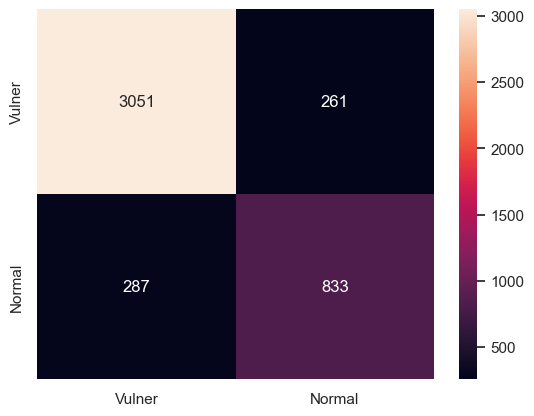

In [4]:
#to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map =[[matriz[0,0],matriz[0,1]],[matriz[1,0],matriz[1,1]]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Vulner","Normal"],columns = ["Vulner","Normal"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")